# `DSML_WS_04` - Introduction to Visualization with Matplotlib and Seaborn

In this tutorial we will continue with our introduction to Python programming for data science. Today we will focus on **visualization**.

We will go through the following:

- **Task**: Analyzing flight data using Pandas
- **Task**: Getting started with Matplotlib
- **Introduction to visualization with `Matplotlib`**: Learn how you can use `Matplotlib` to produce plots that effectively communicate your data
- **Advanced visualization in `Seaborn`**: Use `Seaborn` for advanced visualization of complex relationships

---

## 1. Task: Analyzing flight data using Pandas

Last week, you got to know *the* core data science library in Python - Pandas. Let us put what we learned together in a small real-world case.

I have provided you with a small dataset from the City of Cologne, which is publicly available via [this link](https://www.offenedaten-koeln.de/dataset/dienstfluege-co2-stadt-koeln-2019). It contains a summary of all business flights made by employees of the city in 2019. The following information are available:
- *unit*: code of the organisational unit responsible for these flights
- *origin*: origin airport of the flight route 
- *destination*: destination airport of the flight route
- *flights*: number of flights of this route by the respective organisational unit
- *persons*: number of persons from the organisational unit taking this flight route
- *CO2*: total CO2 emitted as a result of these flights in kilograms

Load the csv file called "business_flights_cologne_2019.csv" into a pandas dataframe (note: data is separated by ";"). Afterwards, use your knowledge of pandas to answer the following questions:
1. Is the provided dataset missing data, i. e. are there missing values?
2. How many business flights took place in total in 2019?
3. How many kilograms of CO2 were emitted as a result of these flights in total in 2019?
4. Which flight route emitted most CO2 per flight per person? (hint: you can sort dataframes using `.sort_values(by='column_name', ascending=False)`)
5. Which organisational unit flew the most? 
6. What was the most common destination?

In [ ]:
# import pandas
import pandas as pd

# load csv
flights = pd.read_csv('business_flights_cologne_2019.csv', sep = ';')
flights.head()

In [ ]:
# Is the provided dataset missing data, i. e. are there missing values?
flights.info()

In [ ]:
# How many business flights took place in total in 2019?
total_flights = flights['flights'].sum()
print('Total number of flights:', total_flights)

In [ ]:
# How many kilograms of CO2 were emitted as a result of these flights in total in 2019?
total_CO2 = flights['CO2'].sum()
print('Total CO2:', total_CO2)

In [ ]:
# Which flight route emitted most CO2 per flight per person?
flights['route_emissions'] = flights['CO2'] / flights['flights'] / flights['persons']
flights.sort_values(by='route_emissions', ascending=False).head(10)

In [ ]:
# Which organisational unit flew the most?
flights.groupby('unit').agg({'flights':'sum'}).sort_values(by='flights', ascending=False).head(10)

In [ ]:
# What was the most common destination?
flights.groupby('destination').agg({'flights':'sum'}).sort_values(by='flights', ascending=False).head()

---

## 2. Task: Getting started with Matplotlib

This week, we will be using Python to visualize data. The library we will be using for this is called Matplotlib.

As always, we first have to import Matplotlib to use its functionalities within this Jupyter notebook. Execute the following cell to continue.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Now let us create some data to visualize. Think about last week (Monday to Sunday). How many steps did you do per day? If you have a tracker like a smartwatch you could check the exact values, or just come up with some hypothetical values. Create a list of strings for each weekday (i.e., ["Mon", "Tue",...]) and assign it to a variable called `weekdays`. Create a second list with your daily step counts from Monday to Sunday and assign it to a variable called `steps`.

In [ ]:
# your code here
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
steps = [8500, 11000, 9500, 10000, 9500, 8500, 2000]

Let us plot our daily steps using Matplotlib. The function to create a simple line plot is `plt.plot(x_values, y_values)`. After plt.plot(...), write plt.show() to print the plot below the cell. Create and print the plot below.

In [ ]:
# your code here
plt.plot(weekdays, steps)
plt.show()

One commonly set goal is to reach 10.000 steps per day. Let's add the 10.000 daily steps target to our plot. Repeat your code from before, but before calling plt.show(), write plt.plot(...) with weekdays as x_values and 7 times 10000 as y_values.

In [ ]:
# your code here
plt.plot(weekdays, steps)
plt.plot(weekdays, [10000]*7)
plt.show()

Now we have two lines: one for our actual daily steps, and one for the daily target of 10.000 steps. Let us add a legend to our plot to include this information. Do this by including the label parameter in each of your plt.plot() functions (e.g., `plt.plot(..., label="label")`), and call `plt.legend()` before plt.show().

In [ ]:
# your code here
plt.plot(weekdays, steps, label="Actual Steps")
plt.plot(weekdays, [10000]*7, label="Step Target")
plt.legend()
plt.show()

Finally, let's add a title and labels for the x-axis and y-axis. We can do so by calling `plt.title("title")`, `plt.xlabel("xlabel")`, and `plt.ylabel("ylabel")` before plt.show(). Create a final version of your plot with corresponding title and labels below.

In [ ]:
# your code here
plt.plot(weekdays, steps, label="Actual Steps")
plt.plot(weekdays, [10000]*7, label="Step Target")
plt.legend()
plt.title("Daily Steps for Last Week")
plt.xlabel("Weekday")
plt.ylabel("Steps")
plt.show()

---

## 3. Introduction to `Matplotlib`

Matplotlib is a multi-platform data visualization library built on NumPy arrays. It was originally designed as a patch to IPython for enabling interactive MATLAB-style plotting from the IPython command line. To those of you with experience in working with MATLAB some of the functionality and styles may, therefore, seem familiar, although syntax varies.

Matplotlib allows for abundant modification and personalization of graphs and plots, which cannot all be covered within the scope of this tutorial. However, when working with the library, the Matplotlib website can act as a powerful reference and source of inspiration. Please have a look [here](https://matplotlib.org/#installation).

Despite being one of the oldest  visualization libraries in Python, Matplotlib is still widely used and valued as a well proven, stable and easy to use tool. New add-ons building on the Matplotlib API and using largely the same code such as Seaborn have emerged, which mainly exhibit slicker designs. These tools are for you to be checked out in your own time and are not part of this course.

Today we will show you:
* How to plot simple graphs
* How to modify the size, shape and design of your graph
* The different plot styles

Just as we use the __np__ shorthand for NumPy and the __pd__ shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting interactively within an IPython notebook can be done with the %matplotlib command, and works in a similar way to the IPython shell. In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:
* `%matplotlib notebook` will lead to interactive plots embedded within the notebook
* `%matplotlib inline` will lead to static images of your plot embedded in the notebook

For this book, we will generally opt for `%matplotlib inline`:

In [ ]:
%matplotlib inline

### Plots and Sub-Plots

We will illustrate the basic functionality of Matplotlib by plotting two simple exponential functions and a simple linear function (x, x^2 and x^3) as line plots.

#### Creating a single (line) plot

For defining the plot we use `plt.plot()`. The command `plt.show()` then starts an event loop by looking for all currently active figure objects, and opening one or more interactive windows that display your figure(s). 

In [ ]:
x = np.linspace(0, 5, 100)

y1=x
y2=x**2
y3=x**3

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.show()

#### Annotating and labelling plots
We can optimize the resulting plot in various ways, e.g.:

* Set a title: `plt.title('name')`
* Name the axes: `plt.xlabel('name')`, `plt.ylabel('name')`
* Include a legend: `plt.plot(label="xx")` and `plt.legend()`

In [ ]:
# Add labels to the plots (will show up in legend)
plt.plot(x, y1, label="linear")
plt.plot(x, y2, label="quadratic")
plt.plot(x, y3, label="cubic")

# Add diagram and axes titles
plt.xlabel('x', fontsize=16, fontname="Arial")
plt.ylabel('f(x)', fontsize=16)
plt.title('Test diagram', fontsize=20)

# Display legend
# Use loc function to choose optimal position of legend (loc=0 means Matplotlib chooses optimal position independently)

plt.legend(loc="lower left")

# Show plot
plt.show()

#### Creating multiple sub plots

Sometimes we may wish to see multiple sub-plots next to each other. For this `plt.subplot()` is a useful tool. We will demonstrate with a quick example.

In [ ]:
# plt.subplot syntax: (# of rows, # of columns, plot number)

# subplot no. 1
plt.subplot(1,2,1)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('diagram #1')
plt.plot(x, y1)

# subplot no. 2
plt.subplot(1,2,2)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('diagram #2')
plt.plot(x, y2)

plt.show()

### Object-based plotting

Object-based plotting offers better control of your plot, particularly if you are working with multiple objects. While in the above examples the axes were created for us in the background, we have to define them here manually. While this might seem more complicated at first it offers better flexibility. For instance, we can add more than one axis.

For object-oriented Matplotlib plots, we start by creating a figure and axes. In their simplest form, a figure and axes can be created as follows:

In [ ]:
# create figure (= empty workspace)
fig_1 = plt.figure(figsize=(10,4))

# add axes to the figure (arguments: left, bottom, width, height (in that order; all specified as fractions of the figure dimensions)); we will explore this further below
ax_1 = fig_1.add_axes([0, 0, 0.5, 0.5])
ax_1.plot(x, y1)

# add elements to axis
ax_1.set_xlabel('x')
ax_1.set_ylabel('f(x)')
ax_1.set_title('Diagram title')

plt.show()

As mentioned above, one of the benefits of object-based Matplotlib plots is greater flexibility, e.g. by adding multiple axes.

In [ ]:
# empty work space
fig_2 = plt.figure()

ax_2 = fig_2.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax_3 = fig_2.add_axes([0.1, 0.1, 0.4, 0.3]) # added axes

# larger diagramm with axes 2
ax_2.plot(x, y2)
ax_2.set_xlabel('x-axis')
ax_2.set_ylabel('y-axis')
ax_2.set_title('Large Diagram')

# smaller diagramm with axes 3
ax_3.plot(y2, x)
ax_3.set_xlabel('x-axis')
ax_3.set_ylabel('y-axis')
ax_3.set_title('Small Diagram')

plt.show()

We can also use object-based plotting for subplots. Here is an example:

In [ ]:
# instead of plt.figure() we use plt.subplots(), creating an array of axes and an empty figure
fig_3, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (10,4))

plt.show()

In [ ]:
# array of axes
print(axes)

In [ ]:
# we can interate through this array to set the axes and plot onto them

for ax in axes:
    ax.plot(x, y3)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
    
# we could also do it without looping:
#axes[0].plot(x, y3)
#axes[0].set_xlabel('x')
#axes[0].set_ylabel('y')
#axes[0].set_title('title')

#axes[1].plot(x, y3)
#axes[1].set_xlabel('x')
#axes[1].set_ylabel('y')
#axes[1].set_title('title')

# display plots
fig_3.tight_layout() # avoid overlapping

fig_3

In [ ]:
# check out our axes object
print(axes)

__Object-based plotting using plt.subplots() is generally the most flexible and covenient way of producing high-quality plots, even with just one pane!__

### Plot appearance

#### Modifying size and shape

Matplotlib allows us to set aspect ratio, DPI and diagram size. For this we use the `figsize` and `dpi` arguments.

* `figsize` is a tupel of width and height in inches (default = (6.4, 4.8))
* `dpi` means dots-per-inch (default = 100.0)

For example:

In [ ]:
# play around with the figsize and dpi arguments
fig_4, ax = plt.subplots(figsize=(10,4), dpi = 100) # note: here we use subplots even for just a single plot

ax.plot(x,y3,label="cubic")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Large Diagram', fontsize=16, fontname="Arial")

plt.legend(loc=0, fontsize=12)

plt.show()

#### Defining diagram area

We can set diagram areas and axes with `set_ylim` and `set_xlim`. Alternatively you can use `axis("tight")` to automatically create a fitted axis:

In [ ]:
fig_5, axes = plt.subplots(1, 3, figsize=(16, 9))

axes[0].plot(x, y2, x, y3)
axes[0].set_title("Standard area")

axes[1].plot(x, y2, x, y3)
axes[1].axis('tight')
axes[1].set_title("Fitted area")

axes[2].plot(x, y2, x, y3)
axes[2].set_ylim([0, 50])
axes[2].set_xlim([0, 3])
axes[2].set_title("User defined area")

plt.tight_layout()
plt.show()

#### Modifying colour and style
We can manually adjust the appearance of the graph. For instance, we may:
* Set line colour
* Set line style

In [ ]:
# add style and labels to the plots (will show up in legend)
plt.plot(x, y1,'b+-',label="x")
plt.plot(x, y2, 'g.--',label="x^2",)

# Add diagram and axes titles
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Test diagram')

# display legend
plt.legend(loc=0)

# Show plot
plt.show()

A whole range of different design options exist. In the following we will show you a few. Please refer to the Matplotlib repository for a comprehensive overview of design options and styles.

In [ ]:
diag, ax = plt.subplots(figsize=(12,6))

# specify color and linewidth
ax.plot(x, x+2, color="red", linewidth=0.25)
ax.plot(x, x+4, color="red", linewidth=0.50)
ax.plot(x, x+6, color="red", linewidth=1.00)
ax.plot(x, x+8, color="red", linewidth=2.00)

# user-defined lines: ‘-‘, ‘-.’, ‘:’
ax.plot(x, x+10, color="green", lw=3, linestyle='-')
ax.plot(x, x+12, color="green", lw=3, linestyle='-.')
ax.plot(x, x+14, color="green", lw=3, linestyle=':')

# possible markers: '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+16, color="blue", lw=1, ls='-', marker='+')
ax.plot(x, x+18, color="blue", lw=1, ls='-', marker='o')
ax.plot(x, x+20, color="blue", lw=1, ls='-', marker='s')
ax.plot(x, x+22, color="blue", lw=1, ls='-', marker='1')

# adjust marker size and colour
ax.plot(x, x+24, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+26, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+28, color="purple", lw=1, ls='-', marker='o', markersize=6, markerfacecolor="red")
ax.plot(x, x+30, color="purple", lw=1, ls='-', marker='o', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=1, markeredgecolor="green")

plt.show()

#### Using styles to create appealing plots

While matplotlib offers a broad range of opportunities to tweak the appearance of your plots, it might be helpful to use packages such as [SciencePlots](https://pypi.org/project/SciencePlots/) or [Aquarel](https://pypi.org/project/aquarel/) to speed up the process of generating presentation-ready figures. We provide two simple examples below, but make sure to check out the linked resources.

In [ ]:
# make sure to install the packages in your environment before importing
import scienceplots
from aquarel import load_theme

In [ ]:
# example using scienceplots
# note that scienceplots requires latex installed on your device; once you do, you can delete the 'no-latex' part
with plt.style.context(['science','no-latex']):
    plt.figure(figsize=(10,6))
    plt.plot(x, y1, label="linear")
    plt.plot(x, y2, label="quadratic")
    plt.plot(x, y3, label="cubic")
    plt.xlabel('x', fontsize=10, fontname="Arial")
    plt.ylabel('f(x)', fontsize=10)
    plt.title('Test diagram', fontsize=18)
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
# example using aquarel
with load_theme("arctic_light"):
    plt.figure(figsize=(10,6))
    plt.plot(x, y1, label="linear")
    plt.plot(x, y2, label="quadratic")
    plt.plot(x, y3, label="cubic")
    plt.xlabel('x', fontsize=10, fontname="Arial")
    plt.ylabel('f(x)', fontsize=10)
    plt.title('Test diagram', fontsize=18)
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
# reset to default Matplotlib style
plt.rcdefaults()

You can save a figure as a png file using the method .savefig

In [ ]:
diag.savefig("test.png")

### Other plot types

In addition to normal `plot` methods there are further arguments to produce various types of diagrams. A hollistic overview of diagram types can be viewed on the official Matplotlib website at: https://matplotlib.org/2.0.2/gallery.html

In [ ]:
# scatter plots:
scatter = plt.figure()
axscat = scatter.add_axes([0.1, 0.1, 0.8, 0.8])

x = np.random.randn(100)
y = 0.5*x**2+0.3*np.random.randn(100)

axscat.scatter(x,y)
axscat.axis("tight")
plt.show()

In [ ]:
# histogram plots:
from random import sample
data = sample(range(1, 1000), 500)

plt.hist(data, bins=20, edgecolor="w")
plt.show()

In [ ]:
# parallel coordinates plot: visualising multidimensional data

# let's import the already familiar iris-dataset for this one
iris = pd.read_csv("iris.csv")

iris.head()

In [ ]:
# note that Pandas has an integrated plotting module that is built on Matplotlib
pd.plotting.parallel_coordinates(iris, class_column = 'Species', cols = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"], color=('red', 'blue', 'green'))
plt.show()

---

## 4. Advanced visualization using `Seaborn`

Seaborn is a library for making statistical graphics in Python. It is built on top of `Matplotlib` and closely integrated with `Pandas` data structures. It provides a high-level interface for drawing attractive and informative statistical graphics. As such, it is often easier to code than pure matplotlib graphs and often results in visually more appealing graphics. Plotting options are very comprehensive. An overview of plot types and styles can be found [here](https://seaborn.pydata.org/introduction.html). In this short introduction we will briefly introduce:
- Categorical plots (barplots, countplots, boxplots, violin plots, etc. )
- Grid plots
- Distibution plots

### Categorical plots

In [5]:
import seaborn as sns


In [6]:
# we import a new dataset, which is built into seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Barplots & Countplots

/opt/miniconda3/envs/DSML_env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/miniconda3/envs/DSML_env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


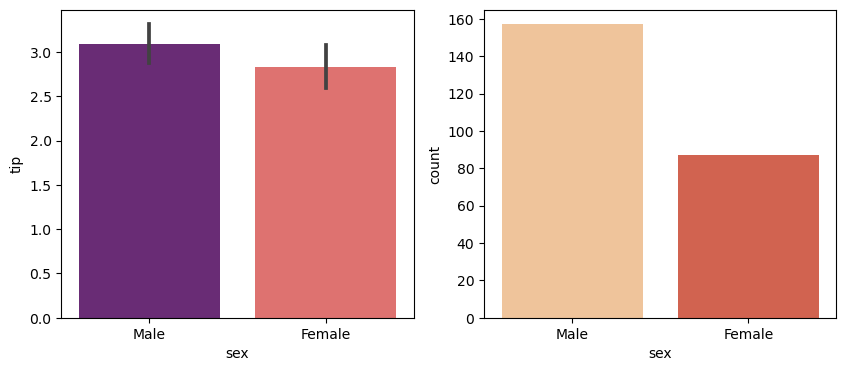

In [9]:
f, axes = plt.subplots(1, 2, figsize=(10, 4)) # if both plots should have the same y-axis, use sharey=True

# barplot: shows point estimates and errors as rectangular bars
sns.barplot(x="sex",y="tip",data=tips,estimator='mean', errorbar=('ci', 95),ax=axes[0],palette="magma")

# countplot: shows the counts of observations in each categorical bin
sns.countplot(x="sex",data=tips, ax=axes[1],palette="OrRd")

plt.show()

#### Box- and Whiskerplots

Boxplots graphically depict groups of numerical data through their quartiles. Boxplots may also have lines extending vertically from the boxes (whiskers), indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

In [ ]:
sns.boxplot(x="day",y="tip",data=tips,palette="mako")
plt.show()

The `hue` statement allows for categorical splitting of the data - a very useful technique.

In [ ]:
sns.boxplot(x="day",y="tip",data=tips,palette="rainbow", hue="sex")
plt.show()

#### Violine plots

Violine plots are somewhat similar to boxplots. The center of the violine resembles a boxplot. Additionally, however, density curves showcase the distributions of data.

In [ ]:
sns.violinplot(x="day", y="tip", data=tips, palette="rainbow")
plt.show()

In [ ]:
# again, the hue argument can be used for categorical splitting
sns.violinplot(x="day", y="tip", data=tips, hue="sex",palette="magma")
plt.show()

In [ ]:
# setting "split" to True will draw half of a violin for each level
sns.violinplot(x="day", y="tip", data=tips,hue='sex',
               split=True,palette="rainbow")
plt.show()

### Distribution plots

#### Histograms

In [ ]:
sns.histplot(tips["tip"], bins=30, kde=True)
plt.show()

#### Jointplots (multiple distributions)

Jointplots are excellent tools for plotting bivariate relationships.

In [ ]:
sns.jointplot(x="total_bill",y="tip",data=tips,
              kind="reg")
plt.show()

### Pair plots

Pair plots allow for the representation of multiple relationships along rows and columns. This is a great tool for uncovering hidden relationships in your data.

In [ ]:
# remember all the variables in our dataset
tips.info()

In [ ]:
sns.pairplot(tips, palette="magma", height=3, hue="time")
plt.show()

---